In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
name = "Salida.txt"

try:
    data = np.genfromtxt(name)
except ValueError as err:
    try:
        data = np.genfromtxt(name, skip_footer=1)
        print("Still writing...")
    except:
        raise ValueError (err)
print("Shape:", data.shape)

Shape: (4998, 16)


In [3]:
df = pd.DataFrame(data)
df = df.rename(columns=dict(
    zip(df.columns,
     ["s0", "o0",
     "a1", "K1", "s1", "o1", "H1",
     "a2", "K2", "s2", "o2", "H2",
     "n1", "n2",
     "t", "dt"])
    ))
df.t /= 365.2563
df.dt /= 365.2563
df["e1"] = np.sqrt(df.K1**2 + df.H1**2)
df["e2"] = np.sqrt(df.K2**2 + df.H2**2)
df["w1"] = np.arctan2(df.H1, df.K1)
df["w2"] = np.arctan2(df.H2, df.K2)
display(df)

,s0,o0,a1,K1,s1,o1,H1,a2,K2,s2,o2,H2,n1,n2,t,dt,e1,e2,w1,w2
0,0.224399,0.436332,0.050000,0.100000,623.842168,1.397412e+00,0.000206,0.200000,-0.100000,628.318502,6.981318e-01,-0.000005,1.538604,0.192417,1.000000e+00,1.000000,0.100000,0.100000,0.002062,-3.141540
1,0.224399,0.436332,0.050000,0.100000,619.399355,1.398553e+00,0.000412,0.200000,-0.100000,628.318441,6.981318e-01,-0.000011,1.538602,0.192417,2.000000e+00,1.000000,0.100000,0.100000,0.004123,-3.141488
2,0.224399,0.436332,0.050000,0.099999,614.989840,1.399687e+00,0.000618,0.200000,-0.100000,628.318380,6.981318e-01,-0.000016,1.538601,0.192417,3.000000e+00,1.000000,0.100001,0.100000,0.006185,-3.141435
3,0.224399,0.436332,0.050000,0.099998,610.613339,1.400812e+00,0.000825,0.200000,-0.100000,628.318320,6.981318e-01,-0.000021,1.538600,0.192417,4.000000e+00,1.000000,0.100001,0.100000,0.008246,-3.141382
4,0.224399,0.436332,0.050000,0.099997,606.269571,1.401930e+00,0.001031,0.200000,-0.100000,628.318259,6.981319e-01,-0.000026,1.538598,0.192417,5.000000e+00,1.000000,0.100002,0.100000,0.010308,-3.141330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.224402,0.436324,0.036172,-0.003263,2.500684,1.000000e-13,-0.001663,0.202416,-0.014020,0.189266,1.000000e-13,-0.007149,2.500483,0.188983,9.714823e+09,27.584653,0.003662,0.015738,-2.670300,-2.670028
4994,0.224402,0.436323,0.036160,-0.003429,2.501924,1.000000e-13,-0.001026,0.202416,-0.014740,0.189253,1.000000e-13,-0.004415,2.501732,0.188983,9.771200e+09,27.803031,0.003579,0.015387,-2.850879,-2.850605
4995,0.224402,0.436323,0.036148,0.001757,2.503132,1.000000e-13,-0.003024,0.202416,0.007560,0.189241,1.000000e-13,-0.013004,2.502948,0.188983,9.827904e+09,28.023437,0.003498,0.015041,-1.044478,-1.044203
4996,0.224402,0.436323,0.036137,-0.003228,2.504308,1.000000e-13,0.001123,0.202416,-0.013886,0.189230,1.000000e-13,0.004826,2.504132,0.188983,9.884938e+09,28.252146,0.003417,0.014701,2.806835,2.807110


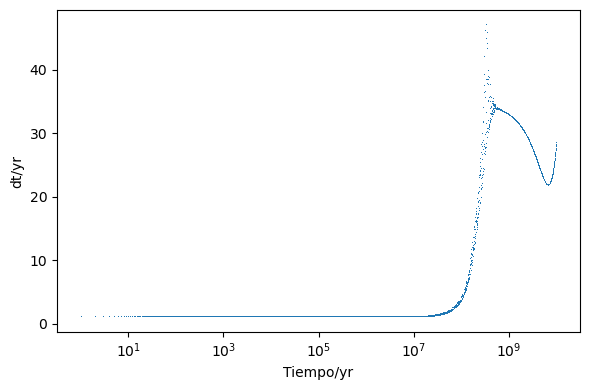

In [4]:
plt.figure(dpi=100)
plt.plot(df.t, df.dt, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("dt/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

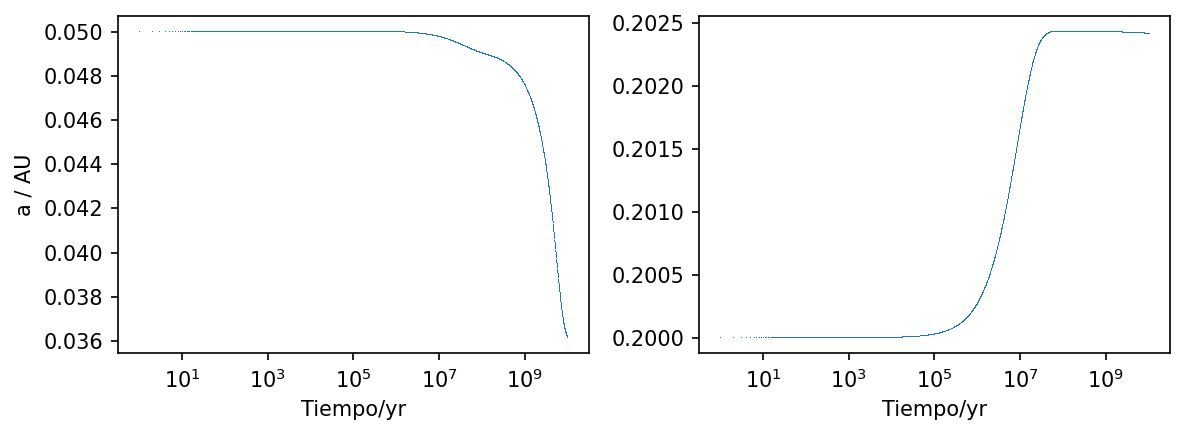

In [5]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.a1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("a / AU")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.a2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

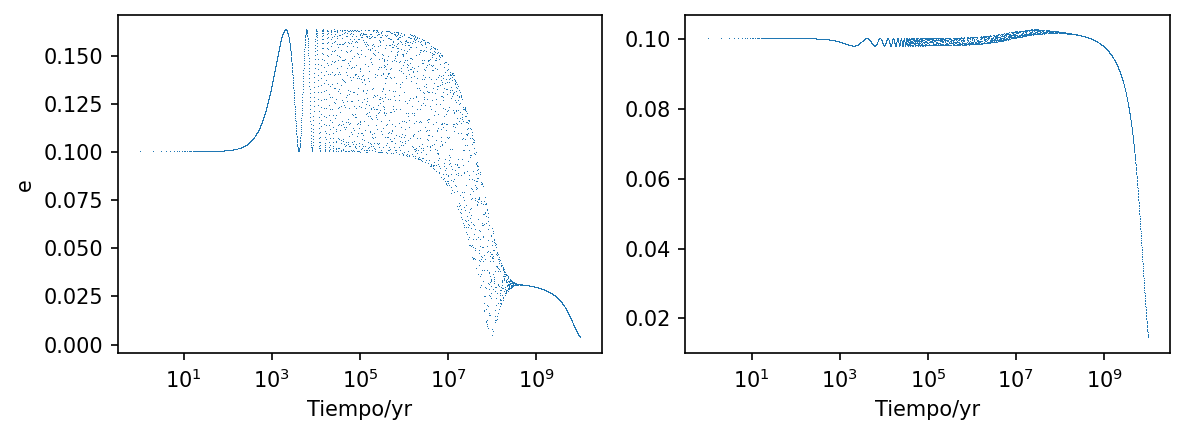

In [6]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.e1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("e")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.e2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

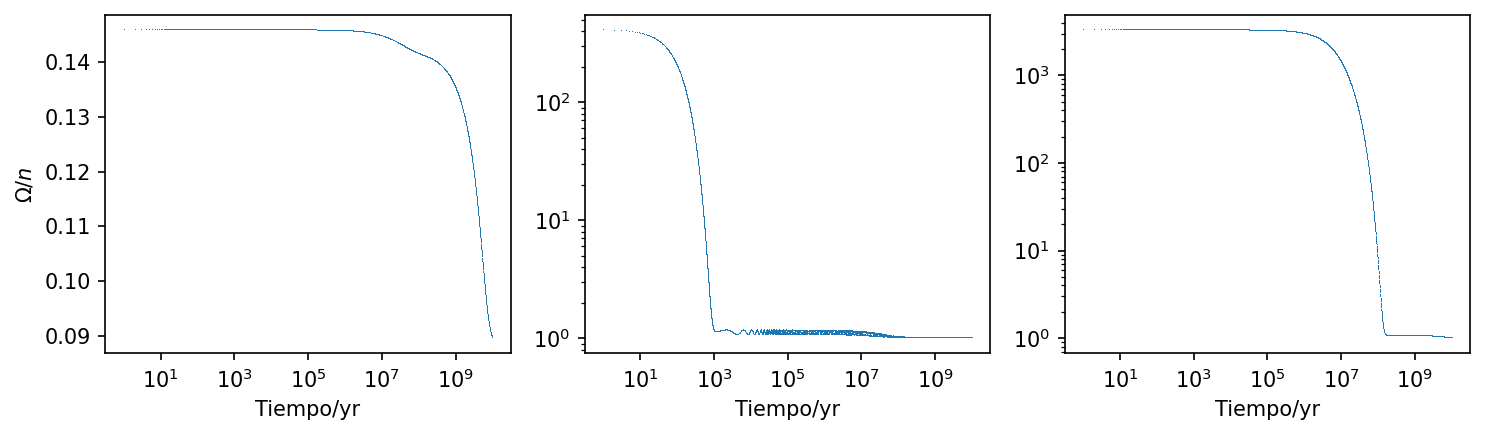

In [7]:
plt.figure(dpi=150, figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(df.t, df.s0/df.n1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("$\Omega / n$")
plt.semilogx()
plt.subplot(1,3,2)
plt.plot(df.t, df.s1/df.n1, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.semilogy()
plt.subplot(1,3,3)
plt.plot(df.t, df.s2/df.n2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.semilogy()
plt.tight_layout()
plt.show()

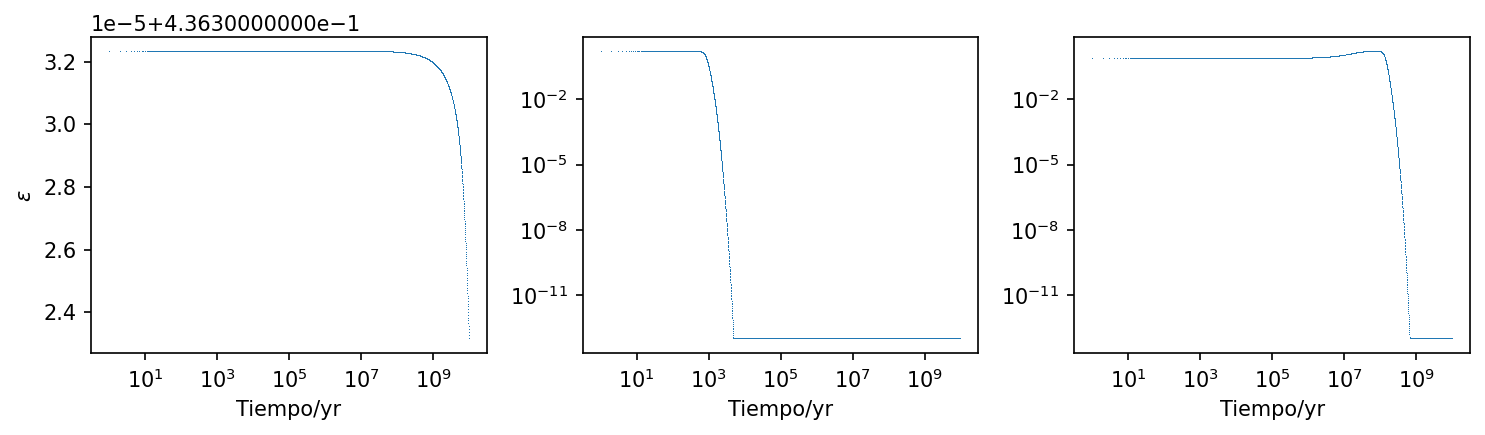

In [8]:
plt.figure(dpi=150, figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(df.t, df.o0, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("$\epsilon$")
plt.semilogx()
plt.subplot(1,3,2)
plt.plot(df.t, df.o1, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.semilogy()
plt.subplot(1,3,3)
plt.plot(df.t, df.o2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.semilogy()
plt.tight_layout()
plt.show()

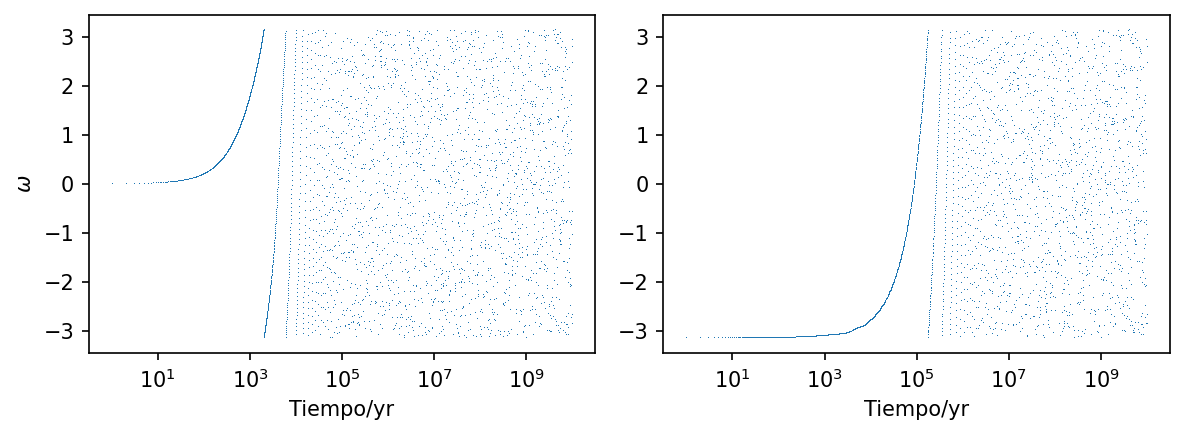

In [9]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.w1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("$\omega$")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.w2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

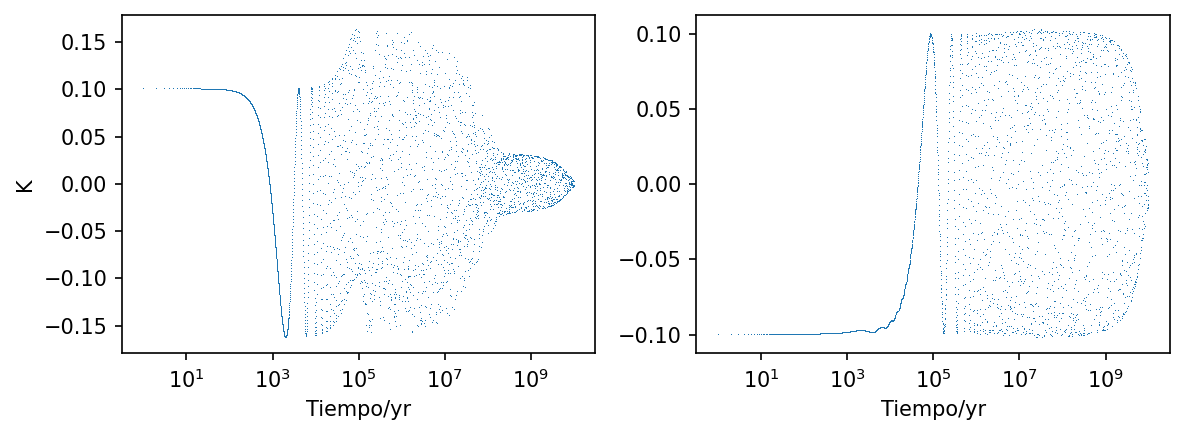

In [10]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.K1, ',')
plt.semilogx()
plt.xlabel("Tiempo/yr")
plt.ylabel("K")
plt.subplot(1,2,2)
plt.plot(df.t, df.K2, ',')
plt.semilogx()
plt.xlabel("Tiempo/yr")
plt.tight_layout()
plt.show()

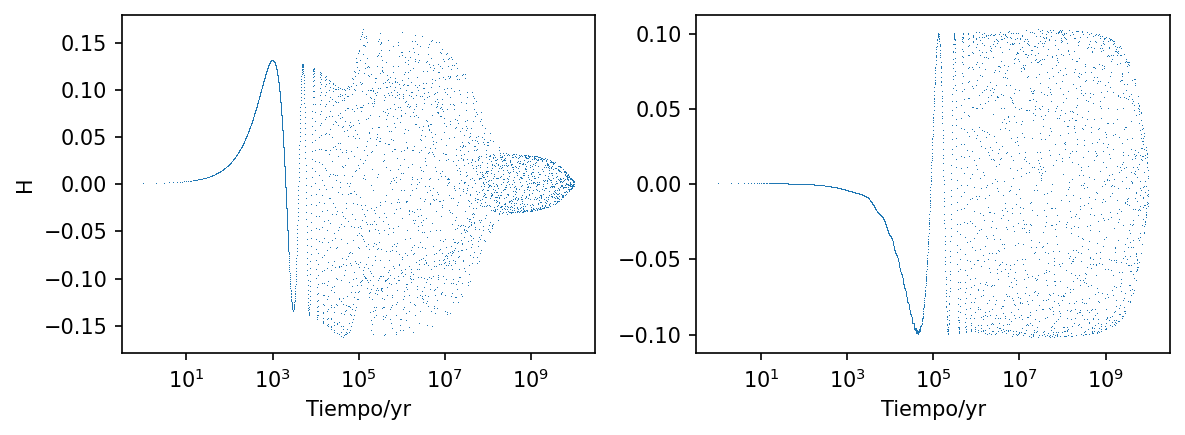

In [11]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.H1, ',')
plt.semilogx()
plt.xlabel("Tiempo/yr")
plt.ylabel("H")
plt.subplot(1,2,2)
plt.plot(df.t, df.H2, ',')
plt.semilogx()
plt.xlabel("Tiempo/yr")
plt.tight_layout()
plt.show()

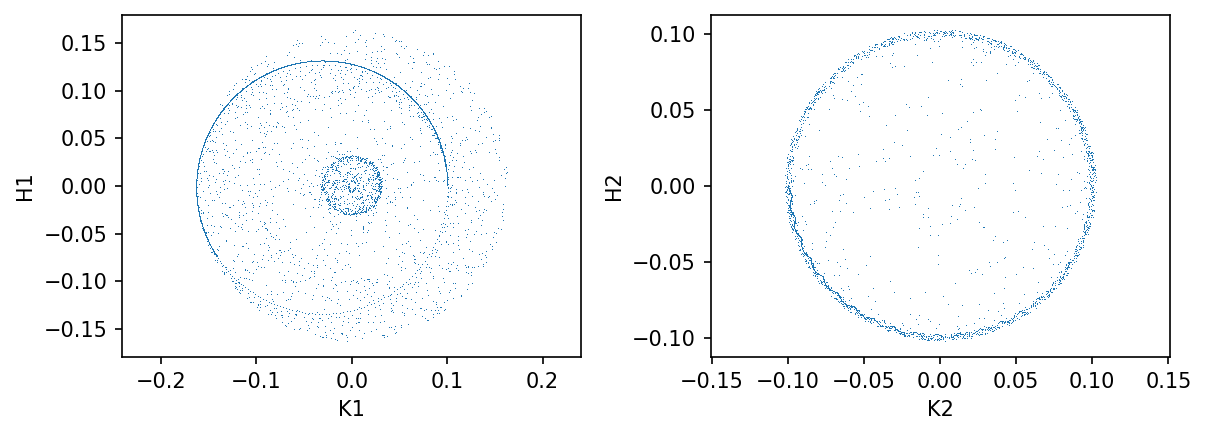

In [12]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.K1, df.H1, ',')
plt.xlabel("K1")
plt.ylabel("H1")
plt.axis("equal")
plt.subplot(1,2,2)
plt.plot(df.K2, df.H2, ',')
plt.xlabel("K2")
plt.ylabel("H2")
plt.axis("equal")
plt.tight_layout()
plt.show()